In [4]:
%pip install -U seaborn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip uninstall botocore -y
%pip install -q 'botocore==1.22.5'



/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Found existing installation: botocore 1.23.23
Uninstalling botocore-1.23.23:
  Successfully uninstalled botocore-1.23.23
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_byt

In [1]:
#import the libraries that we will use
import s3fs
import sagemaker
import pandas as pd

In [2]:
#Now that it is there, in the future you can 
df = pd.read_csv('FakeData.csv')
df

,BEGIN_DATE,Low,High,Precipitation,Snow,Sum_Crashes,Sum_Fatalities,Sum_Persons,text
0,12/10/2015,33.0,44.0,0.00,0.0,0.0,0.0,0.0,"Strong, gusty southerly winds developed ahead ..."
1,12/13/2015,33.5,44.5,0.12,0.0,0.0,0.0,0.0,"A strong, slow moving winter storm crossed Uta..."
2,12/24/2015,34.0,45.0,0.30,0.0,0.0,0.0,0.0,Northern Utah received even more snowfall duri...
3,2/17/2016,34.5,45.5,0.55,3.0,2.0,0.0,0.0,None
4,3/6/2016,35.0,46.0,0.00,2.1,5.0,0.0,0.0,A strong Pacific cold front moved across Utah ...
5,7/19/2016,35.5,46.5,0.00,12.0,12.0,2.0,1.0,"On July 19, an arsonist intentionally set fire..."
6,10/16/2016,36.0,47.0,0.00,0.0,1.0,4.0,2.0,Gusty winds developed both ahead of and behind...
7,10/30/2016,36.5,47.5,0.50,19.0,0.0,0.0,0.0,"A Pacific storm system brought strong, gusty w..."
8,11/28/2016,37.0,48.0,0.78,0.0,0.0,0.0,0.0,Utah experienced its first major snowstorm of ...
9,12/23/2016,37.5,48.5,2.10,0.0,2.0,1.0,1.0,A cold and moist Pacific storm brought heavy s...


In [3]:
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [3]:
df.describe()

,Low,High,Precipitation,Snow,Sum_Crashes,Sum_Fatalities,Sum_Persons
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,45.750000,56.750000,0.418269,3.680769,2.269231,0.692308,0.846154
std,7.577379,7.577379,0.614835,5.639741,3.278662,1.852804,2.452567
min,33.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.375000,50.375000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.750000,56.750000,0.120000,0.000000,1.000000,0.000000,0.000000
75%,52.125000,63.125000,0.550000,5.000000,3.000000,0.250000,0.250000
max,58.500000,69.500000,2.100000,19.000000,12.000000,12.000000,16.000000


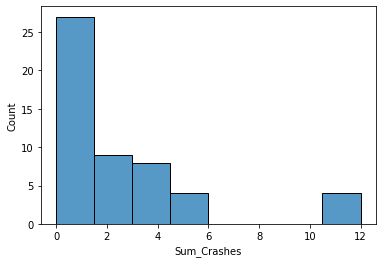

In [5]:
import seaborn as sns
sns.histplot(df['Sum_Crashes']);

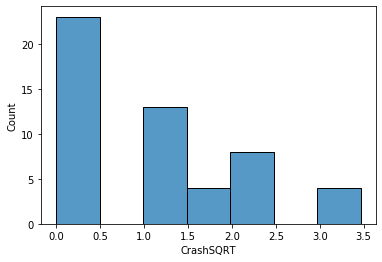

In [6]:
df['CrashSQRT'] =df['Sum_Crashes']**(1/2)
sns.histplot(df['CrashSQRT']);

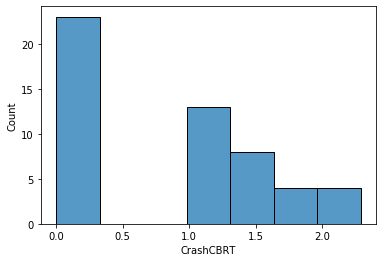

In [7]:
df['CrashCBRT'] =df['Sum_Crashes']**(1/3)
sns.histplot(df['CrashCBRT']);

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


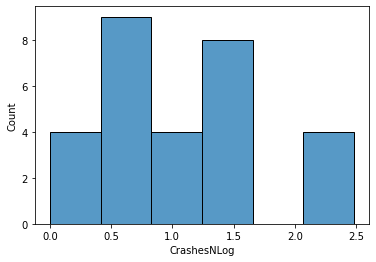

In [8]:
import numpy as np
df['CrashesNLog'] = np.log(df['Sum_Crashes'])
sns.histplot(df['CrashesNLog']);

In [9]:
df.skew()

Low               0.000000
High              0.000000
Precipitation     1.954931
Snow              1.748265
Sum_Crashes       2.032125
Sum_Fatalities    4.799908
Sum_Persons       5.036772
CrashSQRT         0.654628
CrashCBRT         0.189184
CrashesNLog            NaN
dtype: float64

In [10]:
df.head()

,BEGIN_DATE,Low,High,Precipitation,Snow,Sum_Crashes,Sum_Fatalities,Sum_Persons,text,CrashSQRT,CrashCBRT,CrashesNLog
0,12/10/2015,33.0,44.0,0.00,0.0,0.0,0.0,0.0,"Strong, gusty southerly winds developed ahead ...",0.000000,0.000000,-inf
1,12/13/2015,33.5,44.5,0.12,0.0,0.0,0.0,0.0,"A strong, slow moving winter storm crossed Uta...",0.000000,0.000000,-inf
2,12/24/2015,34.0,45.0,0.30,0.0,0.0,0.0,0.0,Northern Utah received even more snowfall duri...,0.000000,0.000000,-inf
3,2/17/2016,34.5,45.5,0.55,3.0,2.0,0.0,0.0,None,1.414214,1.259921,0.693147
4,3/6/2016,35.0,46.0,0.00,2.1,5.0,0.0,0.0,A strong Pacific cold front moved across Utah ...,2.236068,1.709976,1.609438


In [11]:
 df.corr()

,Low,High,Precipitation,Snow,Sum_Crashes,Sum_Fatalities,Sum_Persons,CrashSQRT,CrashCBRT,CrashesNLog
Low,1.000000,1.000000,0.051231,-0.007089,-0.034332,-0.129887,-0.146130,-0.010183,0.000387,-0.056978
High,1.000000,1.000000,0.051231,-0.007089,-0.034332,-0.129887,-0.146130,-0.010183,0.000387,-0.056978
Precipitation,0.051231,0.051231,1.000000,0.388204,0.187673,-0.153151,-0.118639,0.167214,0.151580,0.171944
Snow,-0.007089,-0.007089,0.388204,1.000000,0.387759,-0.062876,-0.035374,0.277910,0.214130,0.840120
Sum_Crashes,-0.034332,-0.034332,0.187673,0.387759,1.000000,0.033271,0.066213,0.928000,0.853556,0.930791
Sum_Fatalities,-0.129887,-0.129887,-0.153151,-0.062876,0.033271,1.000000,0.386357,0.159569,0.219293,-0.291697
Sum_Persons,-0.146130,-0.146130,-0.118639,-0.035374,0.066213,0.386357,1.000000,0.189679,0.236878,-0.141687
CrashSQRT,-0.010183,-0.010183,0.167214,0.277910,0.928000,0.159569,0.189679,1.000000,0.985707,0.978965
CrashCBRT,0.000387,0.000387,0.151580,0.214130,0.853556,0.219293,0.236878,0.985707,1.000000,0.990225
CrashesNLog,-0.056978,-0.056978,0.171944,0.840120,0.930791,-0.291697,-0.141687,0.978965,0.990225,1.000000


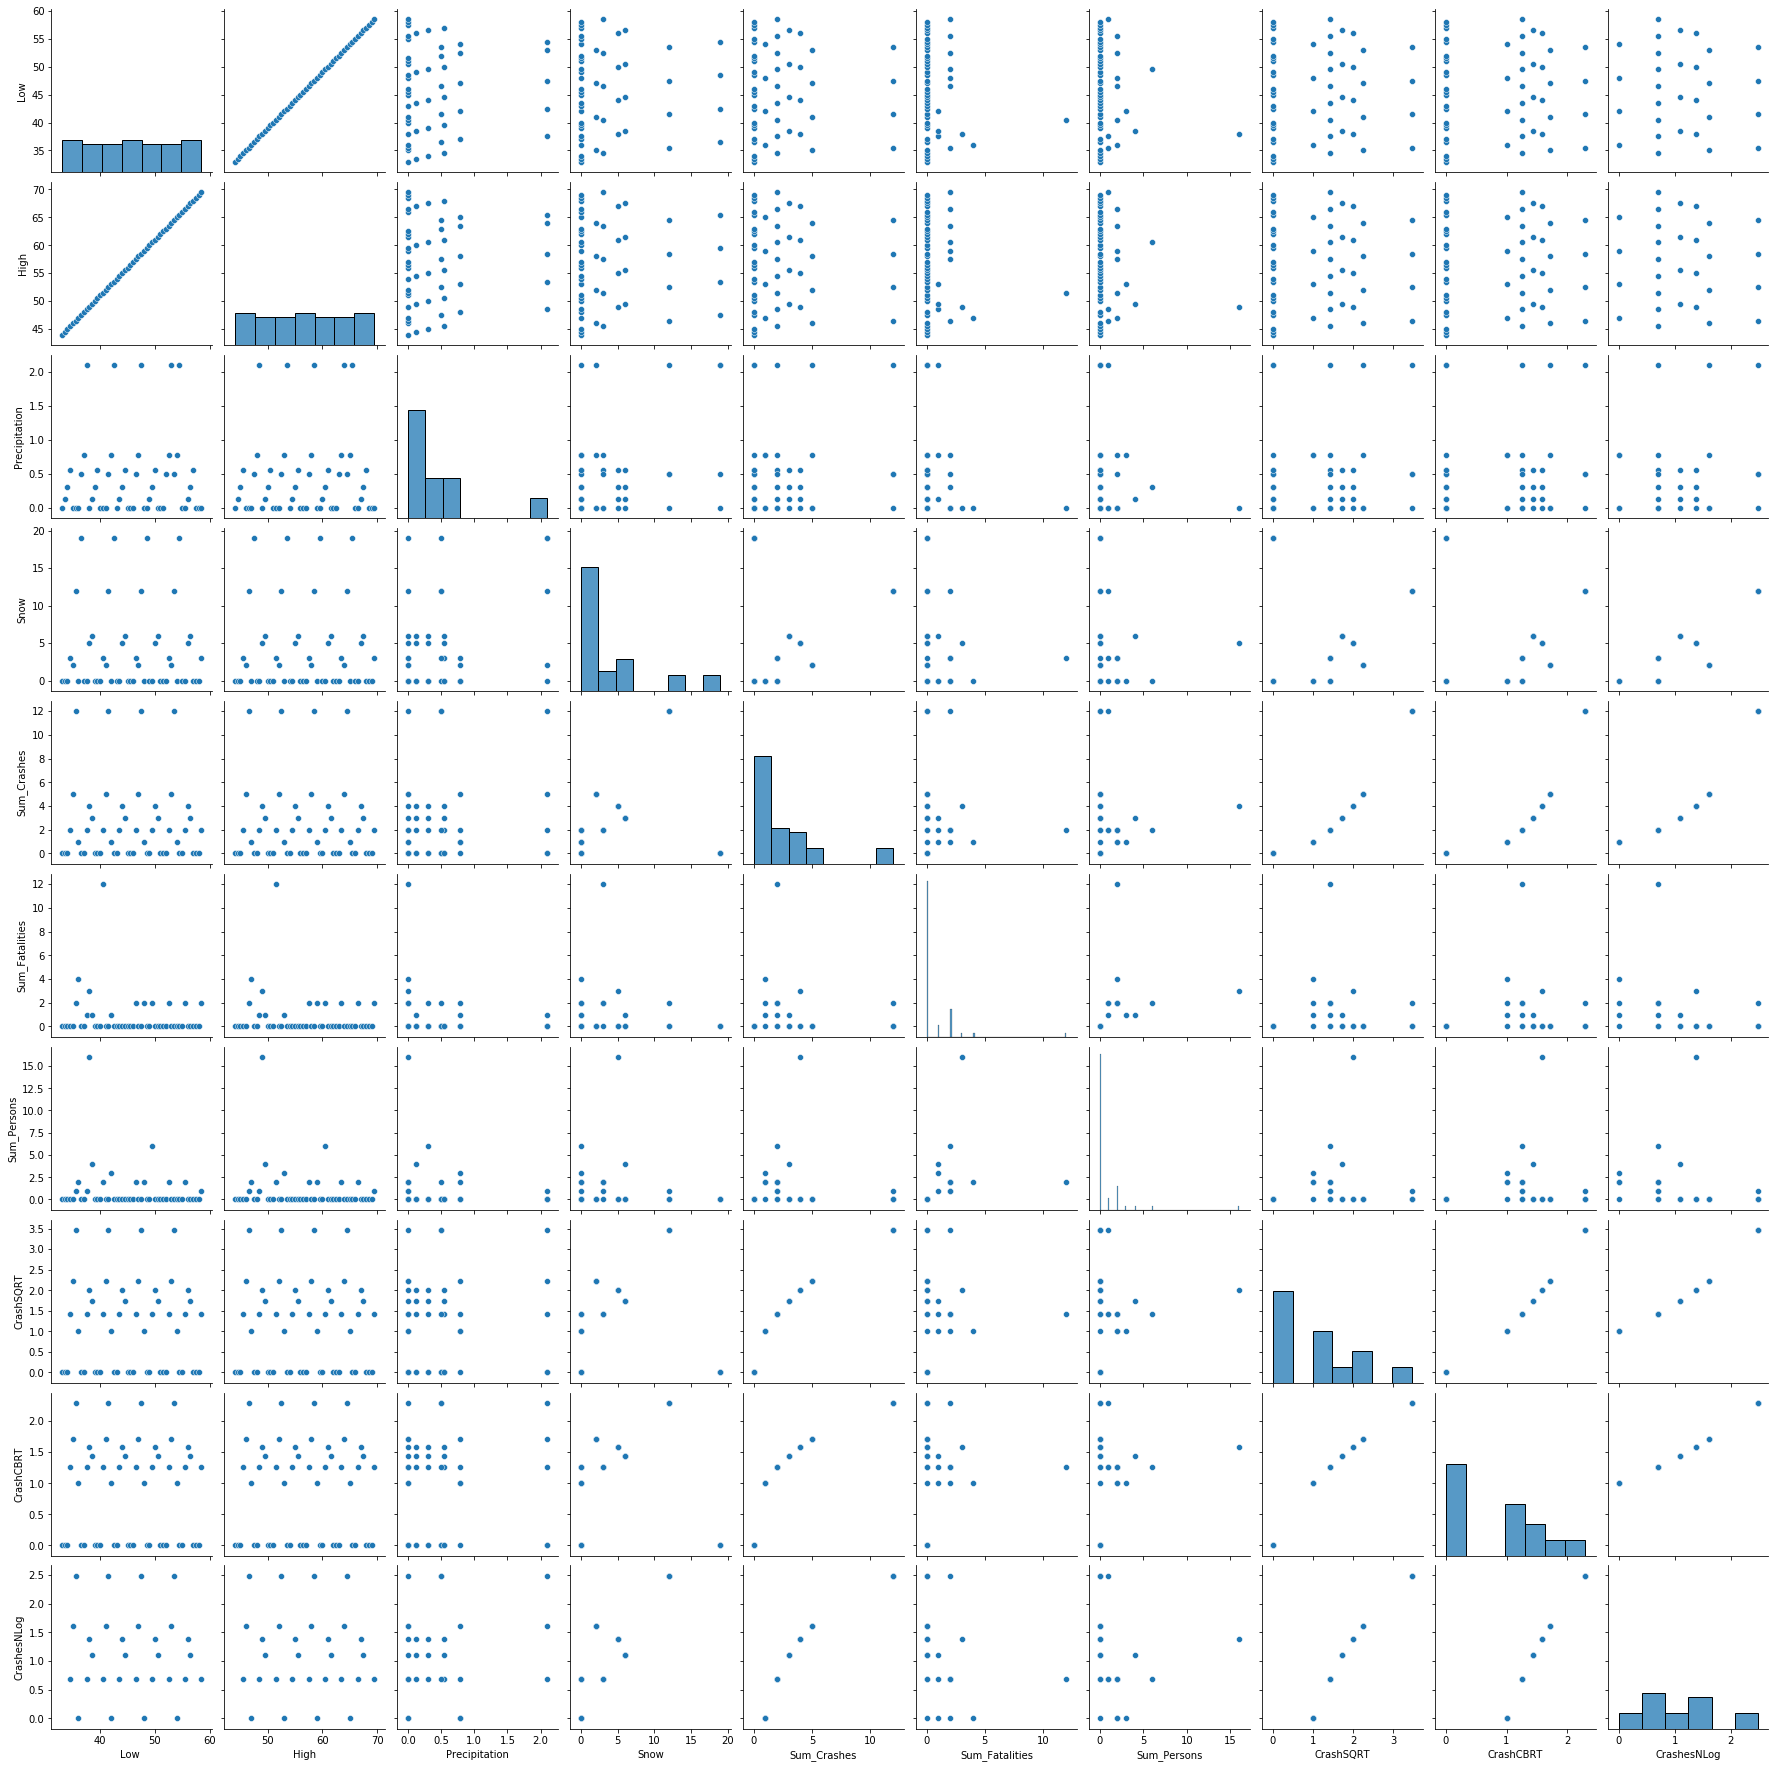

In [12]:
import seaborn as sns
sns.pairplot(df);

In [13]:
df_dummies=df.copy()

for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df_dummies=pd.get_dummies(df_dummies, columns=[col], drop_first=True)

df_dummies.head()


,Low,High,Precipitation,Snow,Sum_Crashes,Sum_Fatalities,Sum_Persons,CrashSQRT,CrashCBRT,CrashesNLog,...,"text_Gusty winds developed both ahead of and behind a cold front, with the strongest winds in the Salt Lake Valley.Peak recorded wind gusts included 70 mph at Vernon Hill, 63 mph at the State Route 201 at Interstate 80 sensor, 61 mph at the Great Salt Lake Marina, and 58 mph at Point of the Mountain.","text_March came in like a lion across Utah, as a storm system produced strong winds on March 2, followed by widespread heavy snowfall across the state.Peak recorded wind gusts across the Salt Lake and Tooele Valleys included 80 mph at Tooele, 74 mph at the SR-201 at I-80 sensor, 63 mph at Olympus Hills, 62 mph at Olympus Cove, and 58 mph at the UDOT I-80 @ mp 78 sensor. Damage in this area included several power poles that were blown over in Tooele, and a carport that was detached from a house in Tooele by the wind; this carport was blown into a power line, and both the power line and carport fell into the street. More than 3,000 people in Tooele County and nearly 1,000 people in Salt Lake County lost power during this event.",text_None,"text_Northern Utah received even more snowfall during a storm that centered on Christmas Day. In addition, Washington County in far southwest Utah also received gusty northerly winds as the storm exited the area.Storm total snowfall reports from this relatively quick event included 10 inches in Tooele, Cottonwood Heights, and South Jordan, as well as 8.5 inches in Taylorsville, 8 inches in Kearns, and 7 inches in Sandy.","text_On July 19, an arsonist intentionally set fire to a field in Tooele. Fanned by strong wind gusts, the fire was pushed to a nearby neighborhood, destroying and damaging several homes.An arsonist intentionally set fire to a field in Tooele on the night of July 19. The fire spread quickly into a nearby neighborhood due to gusty winds, with gusts generally in the 25-35 mph range. By the time firefighters had controlled the blaze by the morning of July 20, the fire had destroyed 10 homes and caused significant damage to 8 other homes. In addition, about eight cars and at least five outbuildings were destroyed. The fire also consumed trees and vinyl fences. Ten people were treated at the hospital for smoke inhalation, and at least three of those were first responders. One person was treated for a head injury from a fall related to the fire.","text_Strong winds developed as a storm system moved through Utah, and were locally enhanced by convective showers.The Flight Park South sensor recorded a peak gust of 58 mph.","text_Strong, gusty southerly winds developed ahead of a Pacific storm system, with the strongest gusts recorded in western Utah.Peak recorded wind gusts in the Salt Lake and Tooele valleys included 69 mph at the Interstate 80 at Milepost 78 sensor, 63 mph at Flight Park South, 60 mph at the Great Salt Lake Marina, and 60 mph at Stockton Bar.",text_The easterly downslope wind event in northern Utah that began on March 31 continued into April 1. Note that this event began in March.The sensor at the University of Utah William Browning Building recorded a maximum wind gust of 58 mph.,"text_Utah experienced its first major snowstorm of the 2016-17 winter at the end of November, with both the mountains and valleys receiving significant amounts of snow over a 2-3 day period.Storm total snowfall included 8 inches at Upper Millcreek, 7 inches at the Upper Avenues and the University of Utah, and 6 inches in Cottonwood Heights.","text_Utah's first significant winter storm of 2018 entered the state on January 19, and brought heavy snowfall to both valley and mountain locations.Heavy snowfall was widespread across the Salt Lake and Tooele Valleys, with storm total snowfall reports of 16 inches in Sandy and Cottonwood Heights, 13.5 inches in Draper, 12.5 inches in Kearns, Upper Millcreek, and Fort Union, and 11 inches in Tooele. For the calendar day of January 20, Tooele record

In [ ]:
df_dummies

KeyboardInterrupt: 

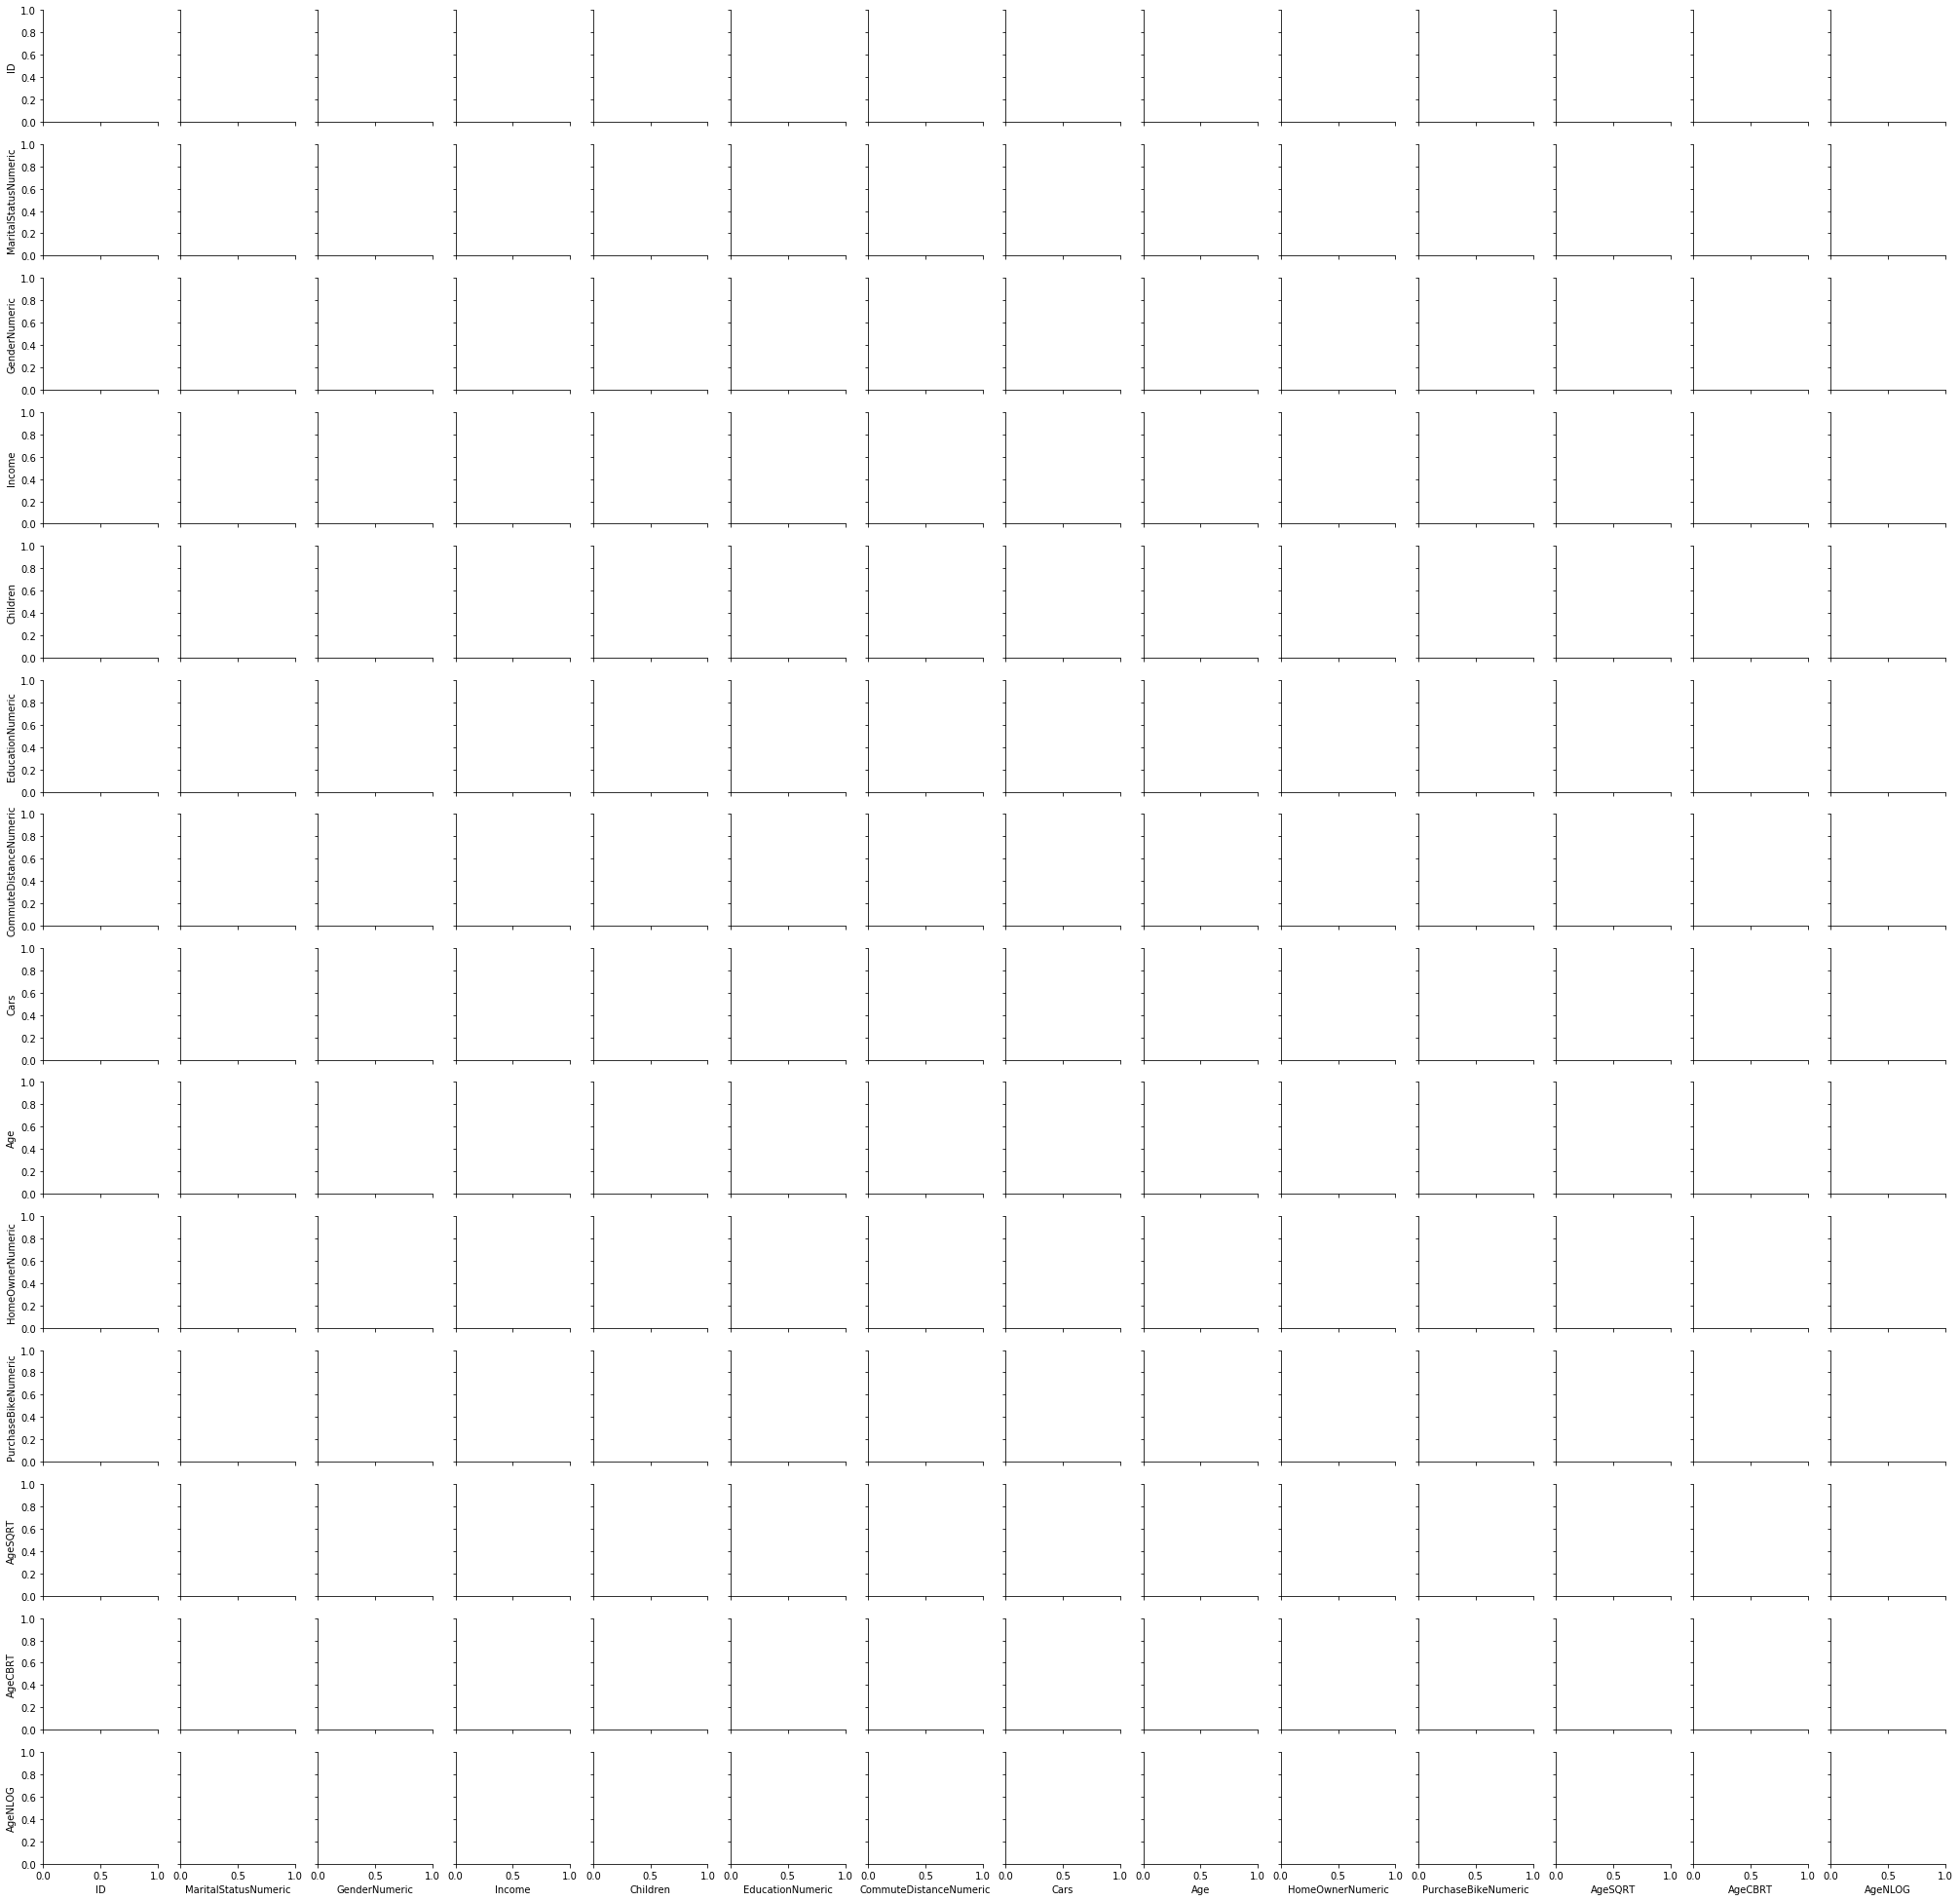

In [16]:
import seaborn as sns
sns.pairplot(df);

In [ ]:
df[['Age','Income','Children','Commute Distance']].skew()

In [15]:
#modeling
import statsmodels.api as sm 

y = df_dummies['Purchased Bike_Yes']
X = df_dummies.drop(columns=['PurchaseBikeNumeric','Purchased Bike_Yes','Age','AgeSQRT','AgeCBRT'])
X['const'] = 1

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Purchased Bike_Yes   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.241
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           7.21e-21
Time:                        03:11:06   Log-Likelihood:                -649.55
No. Observations:                1000   AIC:                             1345.
Df Residuals:                     977   BIC:                             1458.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
ID            

In [20]:
y = df_dummies['Purchased Bike_Yes']
X = df_dummies.drop(columns=['PurchaseBikeNumeric','Purchased Bike_Yes'])
X['const'] = 1

sm_model = sm.RLM(y,X).fit()
#print(logit_model.summary())

In [19]:
from sklearn.model_selection import train_test_split
#X.drop(columns=['const'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112345)
X_train.head()

,ID,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,...,Occupation_Professional,Occupation_Skilled Manual,Home Owner_Yes,Commute Distance_1-2 Miles,Commute Distance_10+ Miles,Commute Distance_2-5 Miles,Commute Distance_5-10 Miles,Region_North America,Region_Pacific,const
63,21554,0,1,80000,0,4,5,3,33,0,...,1,0,0,0,1,0,0,0,1,1
156,11000,1,0,90000,2,4,2,0,40,1,...,1,0,1,1,0,0,0,0,1,1
548,11219,1,0,60000,2,2,5,2,55,1,...,1,0,1,0,1,0,0,1,0,1
168,11585,1,1,40000,1,4,1,0,41,1,...,0,1,1,0,0,0,0,0,0,1
13,19475,1,1,40000,0,4,1,0,40,0,...,1,0,0,0,0,0,0,0,0,1


In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=12345).fit(X_train, y_train)
dtr.score(X_test, y_test)

-0.5224358974358976

In [24]:
import joblib
joblib.dump(dtr,'trained_model.sav')

['trained_model.sav']

In [25]:
import joblib
import pickle

# Save the model with the highest fit metric
pickle.dump(dtr, open('stored_model.sav', 'wb'))  # OPTION 1: pickle
joblib.dump(dtr, "stored_model.pkl")              # OPTION 2: joblib

['stored_model.pkl']

In [29]:
import s3fs
import sagemaker
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket() 
s3 = sagemaker_session.boto_session.resource('s3')

In [32]:
bucket = f's3://s3://corissaawsbyu/class/data/'
s3.Bucket('s3://sagemaker-studio-905566972080-nhkriapt1lc/class/data/').upload_file("stored_model.pkl")

TypeError: bucket_upload_file() missing 1 required positional argument: 'Key'